# numpy学习

## numpy.array() 的认识以及shape，len(),ndim和size的认识

numpy.array(object,dtype)  
ocject转换为数组的输入数据，可以是列表、元组、其他数组或类似序列的对象。  
dtype参数用于指定数组的数据类型。如果不置顶dtype参数，则numpy会自动推断数组的数据类型。

In [37]:
import numpy as np
# 从列表中创建一位数组
arr1=np.array([1,2,3,4])
print(arr1)
#指定数组的数据类型
arr2=np.array([1,2,3,4],dtype=float)
print(arr2)
#从元组中创建二维数组
arr3=np.array([(1,2,3),(4,5,6)])
print(arr3)
# 指定最小维度
arr4=np.array([1,2,3,4],ndmin=1)
print(arr4)

[1 2 3 4]
[1. 2. 3. 4.]
[[1 2 3]
 [4 5 6]]
[1 2 3 4]


In [ ]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import math 
from matplotlib import cm

def visualize_2D(array,title,vmax,vmin):
    fig_width =math.ceil(array.shape[1]*0.5)
    fig_length =math.ceil(array.shape[0]*0.5)

    fig,ax =plt.subplots(figsize=(fig_width,fig_length))

    sns.heatmap(array,
                vmax=vmax,
                vmin=vmin,
                annot=True,
                fmt='.0f',
                square=True,
                cmap='RdYlBu_r',
                linewidths=.5,
                cbar=False,
                yticklabels=False,
                xticklabels=False,
                ax=ax)
    
def visualize_1D(array,title):
    fig,ax=plt.subplots()
    colors = cm.RdYlBu_r(np.linspace(0,1,len(array)))
    for idx in range(len(array)):
        circle_idx = plt.Circle((idx,0),0.5,
                                facecolor=colors[idx],
                                edgecolor="w")
        ax.add_patch(circle_idx)
        ax.text(idx,0,s = str(array[idx]),
                horizontalalignment='center',
                verticalalignment='center')
    ax.set_xlim(-0.6,0.6+len(array))
    ax.set_ylim(-0.6,0.6)
    ax.set_aspect('equal',adjustable='box')
    ax.axis('off')



[-3 -2 -1  0  1  2  3]
(7,)
7
1
7


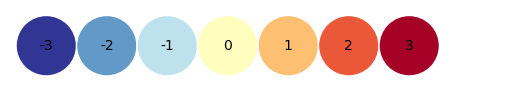

In [39]:
a_1D=np.array([-3,-2,-1,0,1,2,3]) #生成一个一位数组

print(a_1D) #生成数组
print(a_1D.shape) #生成形状
print(len(a_1D)) #生成长度
print(a_1D.ndim) # 生成维度
print(a_1D.size)# 生成大小

visualize_1D(a_1D,'手动,一维')


[[-3 -2 -1]
 [ 0  1  2]]
(2, 3)
2
3
2
6
2


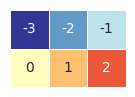

In [41]:
a_2D=np.array([[-3,-2,-1],
               [0,1,2]])
print(a_2D)
print(a_2D.shape)
print(a_2D.shape[0])
print(a_2D.shape[1])
print(a_2D.ndim)
print(a_2D.size)
print(len(a_2D))
visualize_2D(a_2D,'手动，二维',3,-3)

(1, 7)
2


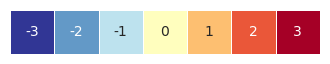

In [42]:
a_row_vector=np.array([[-3,-2,-1,0,1,2,3]])

visualize_2D(a_row_vector,'手动，行向量',3,-3)
print(a_row_vector.shape)
print(a_row_vector.ndim)


(7, 1)
2


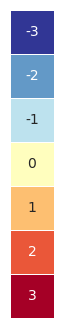

In [44]:
a_col_vector=np.array([[-3],[-2],[-1],[0],[1],[2],[3]])

visualize_2D(a_col_vector,'手动，列向量',3,-3)
print(a_col_vector.shape)
print(a_col_vector.ndim)

(2, 3, 4)
3
2
(3, 4)


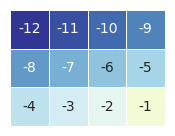

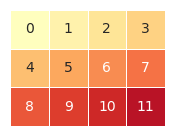

In [68]:
a_3D=np.array([[[-12,-11,-10,-9],
                [-8,-7,-6,-5],
                [-4,-3,-2,-1]],
                [[0,1,2,3],
                 [4,5,6,7],
                 [8,9,10,11]]])
print(a_3D.shape) #(2,3,3)
print(a_3D.ndim) #3
print(len(a_3D))
visualize_2D(a_3D[0],'手动，三维，第一页',12,-12)
print(a_3D[0].shape)
visualize_2D(a_3D[1],'手动，三维，第二页',12,-12)


In [70]:
list_1D=[1,2,3,4,5]
array1=np.array(list_1D)
print(array1.shape)

(5,)


## 生成数列（一维数组）

`按步长生成等差数列`：  
numpy.arange(start,stop,step)  
生成一个从start开始，步长为step的`等差数列`,`不包括stop值`。  
`取值范围：[start,end]`(end值小于stop)

In [72]:
a=np.arange(1,23,4)
print(a)

[ 1  5  9 13 17 21]


`按数量生成等差数列`：  
numpy.linspace(start,stop,num，endpoint)  
生成一个从start开始，个数为num（默认50）的`等差数列`,`默认包括stop值`。  
`取值范围：[start,stop]`

In [77]:
b=np.linspace(1,2,5)
print(b)

[1.   1.25 1.5  1.75 2.  ]


`按数量生成等比数列`  

numpy.logspace(start,stop,num,base)   
从base 的start 次幂开始，到base 的stop 次幂结束，num 指定数列的长度，默认为50。  
取值范围：[base<sup>start</sup>,base<sup>stop</sup>]

In [80]:
c=np.logspace(0,4,5,base=4)
print(c)

[  1.   4.  16.  64. 256.]


## 生成网格数据

(21, 21)


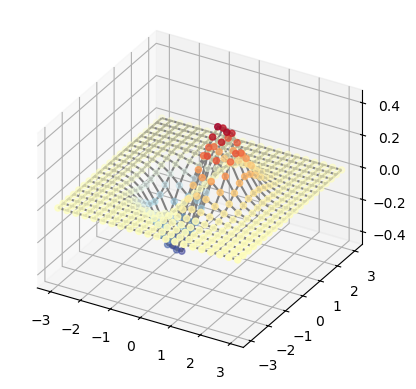

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x1_array = np.linspace(-3,3,21)
x2_array = np.linspace(-3,3,21)
xx1,xx2 = np.meshgrid(x1_array,x2_array)# 将两个一维数组转变为二维数组
ff=xx1*np.exp(-xx1**2-xx2**2)
print(xx1.shape)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(xx1,xx2,ff,
                   rstride=1,cstride=1,
                   color='grey')
ax.scatter(xx1,xx2,ff,c=ff,cmap='RdYlBu_r')
ax.set_proj_type('ortho')
plt.show()

## 特殊数组

In [15]:
np.empty((2,3))

array([[0.08131104, 0.08131104, 0.02776824],
       [0.04955546, 1.04118972, 0.99654686]])

In [16]:
np.zeros((5,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [17]:
np.ones((2,4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [22]:
np.full((1,2,3),9)

array([[[9, 9, 9],
        [9, 9, 9]]])

In [24]:
np.eye(9)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [31]:
a=np.array([[1,2,3],[1,3,4],[2,3,4]])
np.full_like(a,2)

array([[2, 2, 2],
       [2, 2, 2],
       [2, 2, 2]])

## 随机数